# **UTS Kelompok 5**

1.   Masfudin Dwi Cahyo (3D/17/2141720010)
2.   Muhammad Akbar Nur Ihsan (3D/22/2141720225)
3.   Mukhamad Faruq Al Fahmi (3D/25/2141720066)



---




## **Segmentasi Gambar dengan Clustering**


Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.


---



### **Ketentuan UTS**

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan.
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR



---



## Import Library

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
import os
import random
from sklearn.cluster import KMeans

# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
directory = "/content/drive/MyDrive/Machine Learning/Week 08/dummy"

## Preprocessing dengan Funsgi plot_pixels

In [4]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Choose a random subset of data for plotting
    rng = np.random.default_rng(0)
    i = rng.permutation(data.shape[0])[:N]

    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set_xlabel('Red')
    ax[0].set_ylabel('Green')
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set_xlabel('Red')
    ax[1].set_ylabel('Blue')
    ax[0].set_xlim(0, 1)
    ax[0].set_ylim(0, 1)
    ax[1].set_xlim(0, 1)
    ax[1].set_ylim(0, 1)
    fig.suptitle(title, size=20)


## **Proses Segementasi dengan K-Means**

### **Citra 1** (Mukhamad Faruq Al Fahmi)

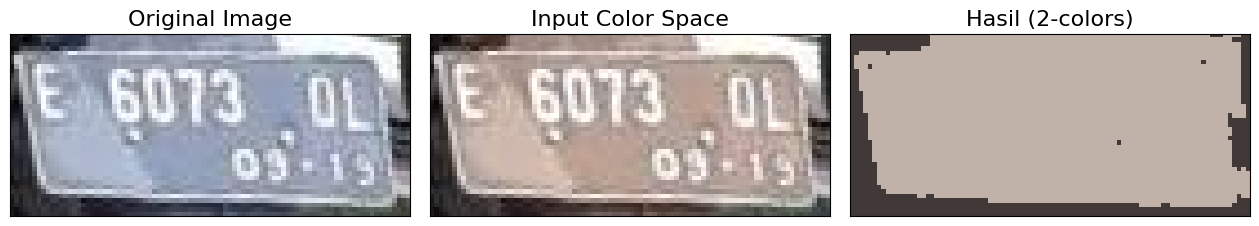

<Figure size 640x480 with 0 Axes>

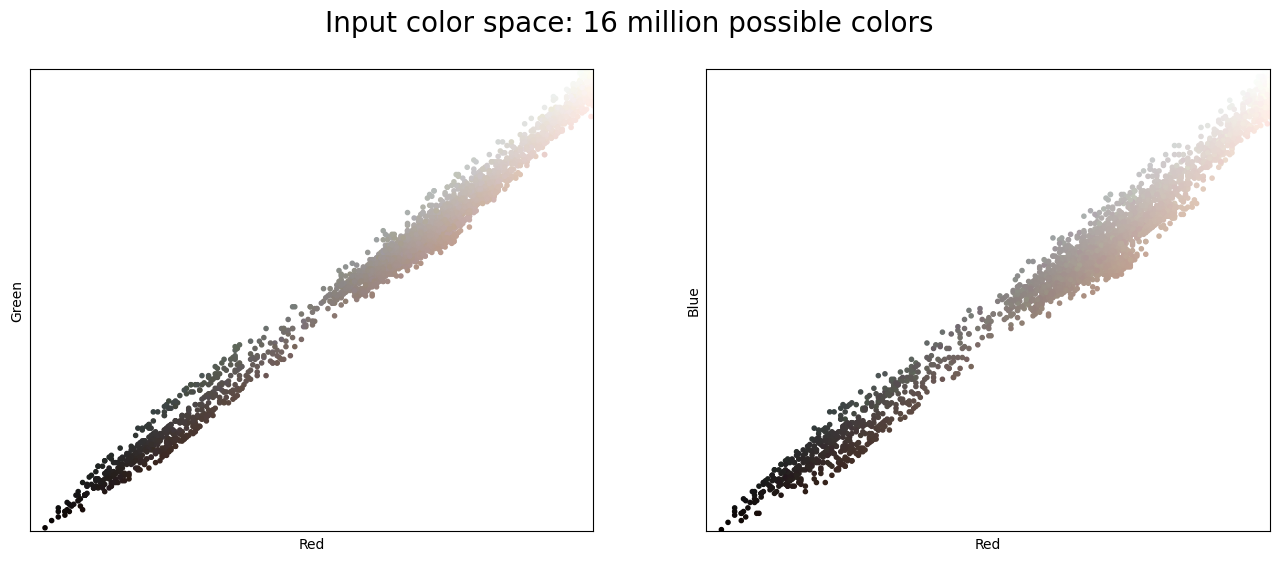

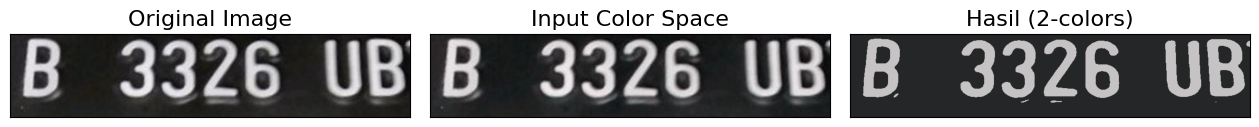

<Figure size 640x480 with 0 Axes>

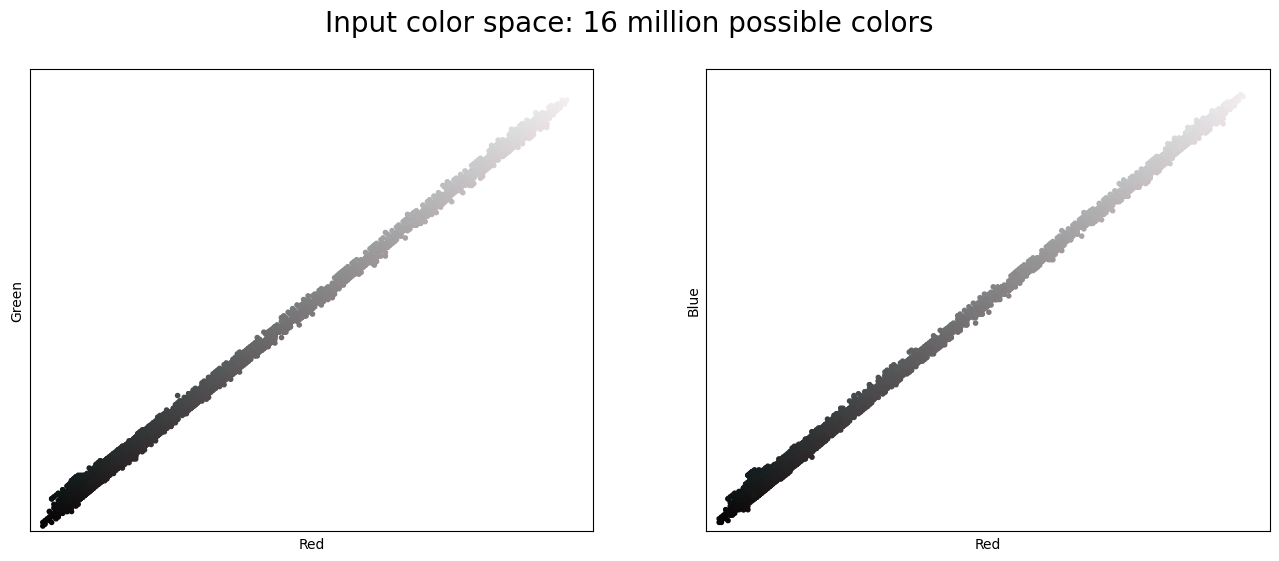

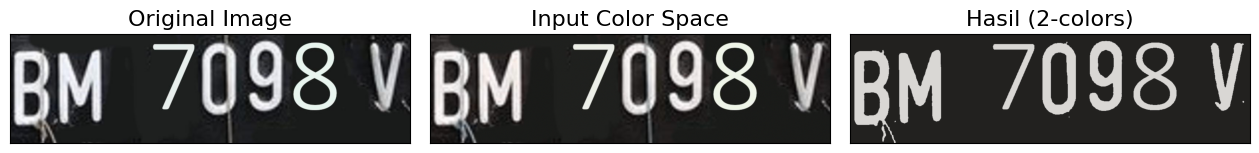

<Figure size 640x480 with 0 Axes>

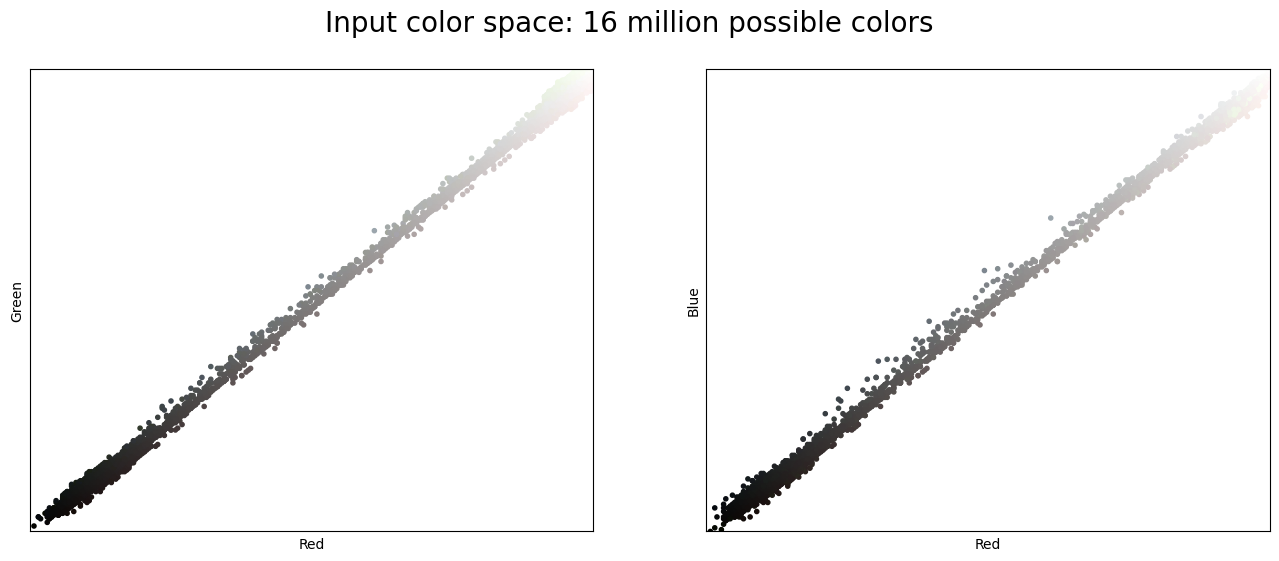

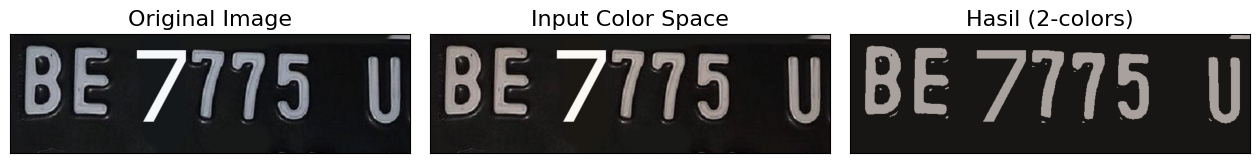

<Figure size 640x480 with 0 Axes>

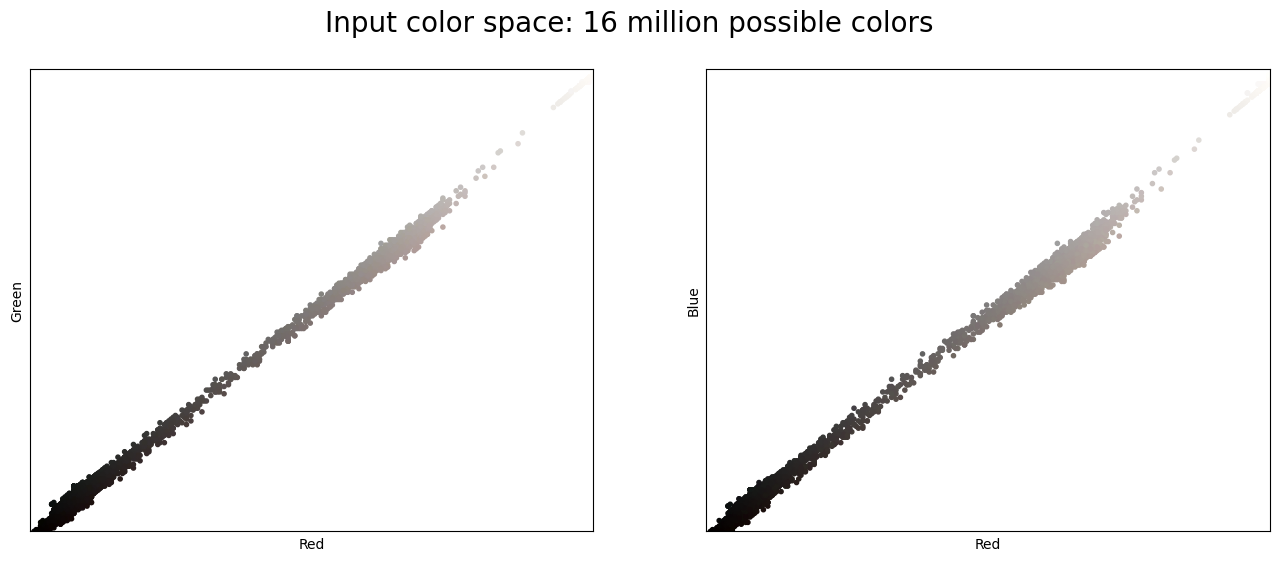

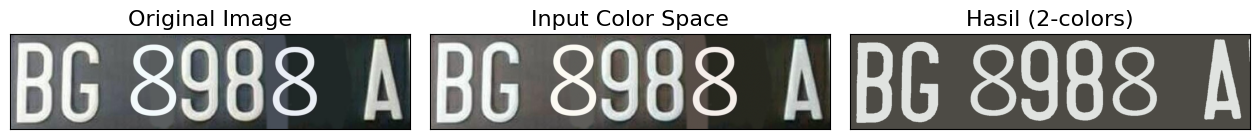

<Figure size 640x480 with 0 Axes>

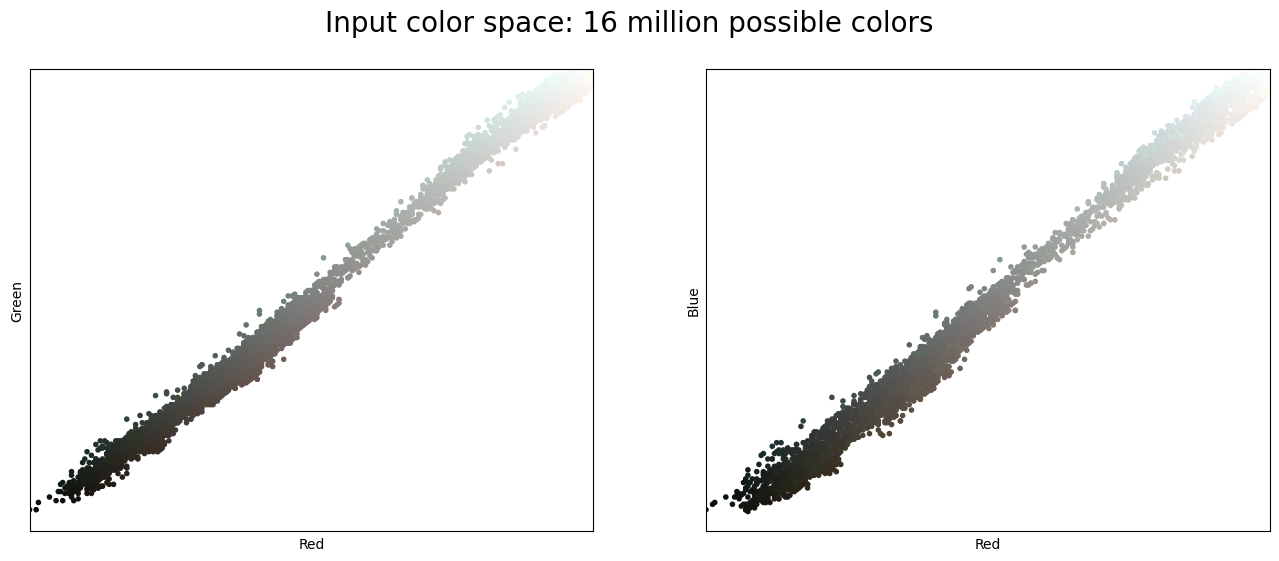

In [8]:
# Mengambil File dari variabel directory
# Fungsi os.listdir() digunakan untuk memuat daftar file dalam direktori, dan kemudian daftar tersebut difilter menggunakan fungsi endswith() untuk memilih hanya file yang berformat JPG, JPEG, atau PNG
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Ambil 5 indeks acak dari daftar gambar
random_indexes = random.sample(range(len(image_files)), 5)

# Loop melalui indeks gambar yang telah dipilih
for index in random_indexes:

    img_file = image_files[index]
    img_path = os.path.join(directory, img_file)
    img = cv2.imread(img_path)

    # PREPROCESSING
    h, w, ch = img.shape
    data = img / 255.0  # mengubah piksel menjadi rentang 0 hingga 1
    data = data.reshape(h * w, ch)  # mengubah bentuk citra menjadi array satu dimensi

    # Proses segmentasi dengan K-Means
    kmeans = KMeans(n_clusters=2, n_init=8) # jumlah klaster sebanyak 2 untuk menghasilkan gambar 2 warna (2-colors)
    kmeans.fit(data)  # melatih model
    predict = kmeans.predict(data)  # prediksi klaster
    cluster_centers = kmeans.cluster_centers_ # mendapatkan nilai titik tengah dari setiap cluster
    new_colors = cluster_centers[predict] # menentukan warna baru
    img_recolored = new_colors.reshape((h, w, ch))  # mengubah dimensi seperti gambar asli

    # Tampilkan citra asli, citra dalam color space, dan citra yang sudah di-segmentasi
    fig, ax = plt.subplots(1, 3, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(data.reshape((h, w, ch)))
    ax[1].set_title('Input Color Space', size=16)
    ax[2].imshow(img_recolored)
    ax[2].set_title('Hasil (2-colors)', size=16)

    # Tampilkan plot color space
    plt.figure()
    plot_pixels(data, title='Input color space: 16 million possible colors')

    plt.show('\n')


### **Citra 2** (Masfudin Dwi Cahyo)

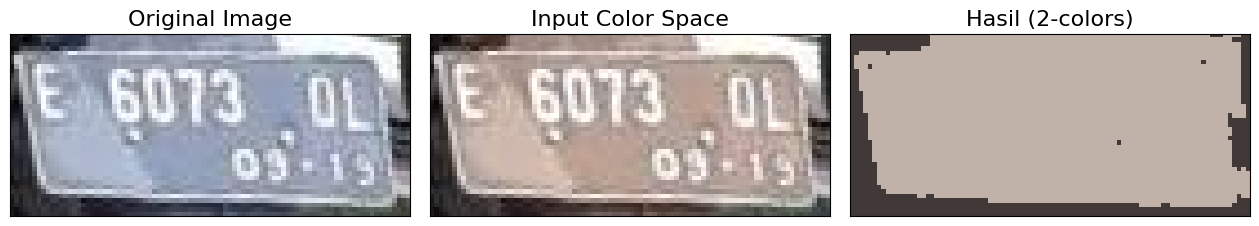

<Figure size 640x480 with 0 Axes>

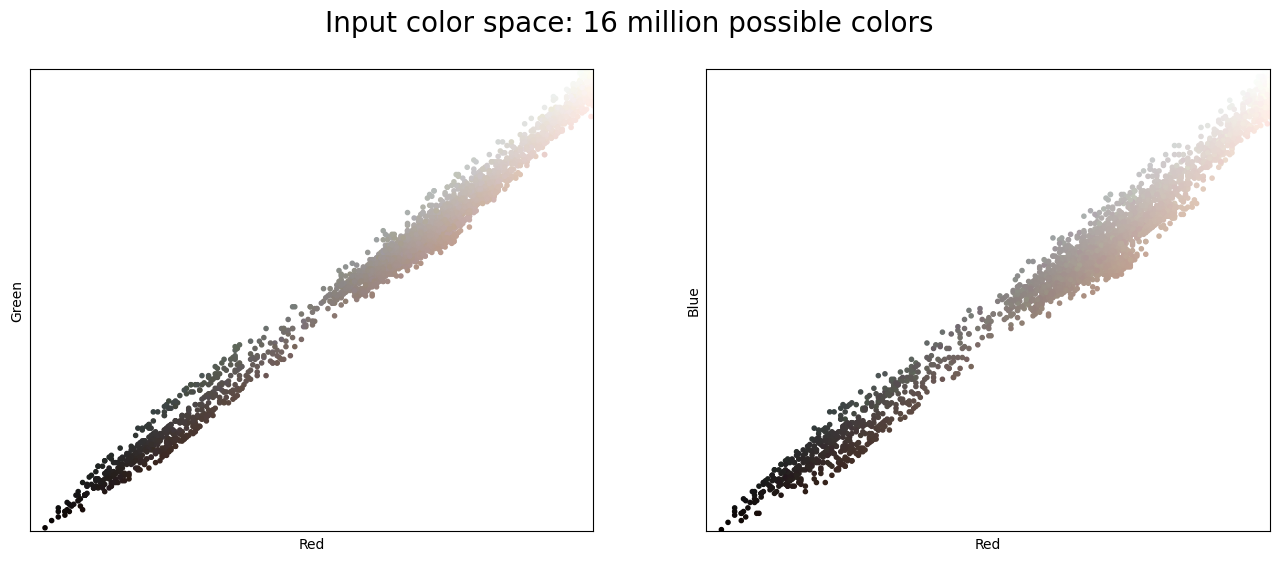

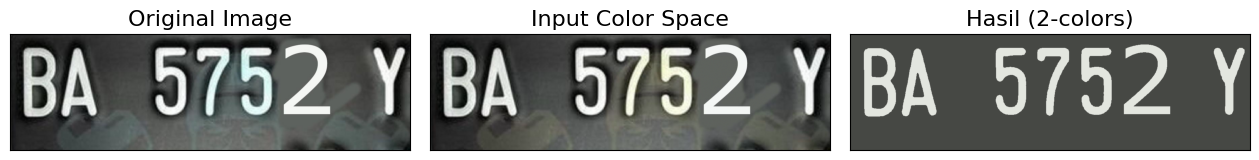

<Figure size 640x480 with 0 Axes>

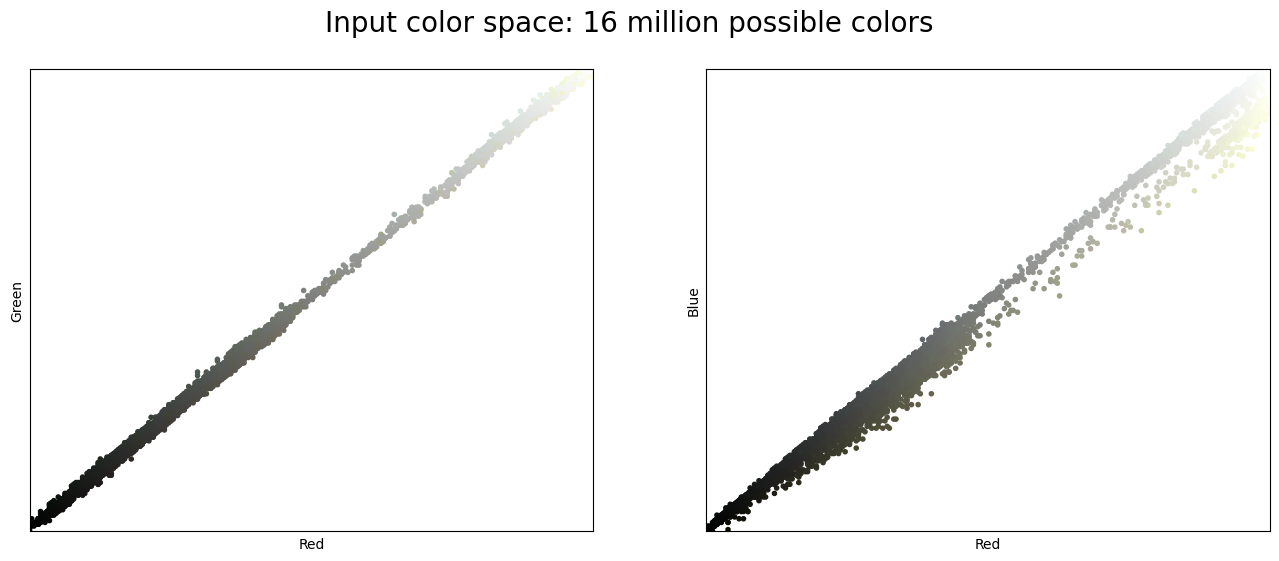

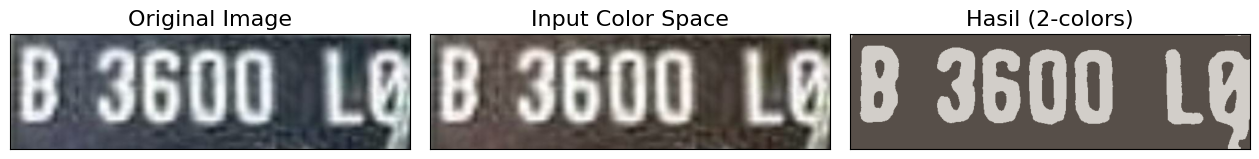

<Figure size 640x480 with 0 Axes>

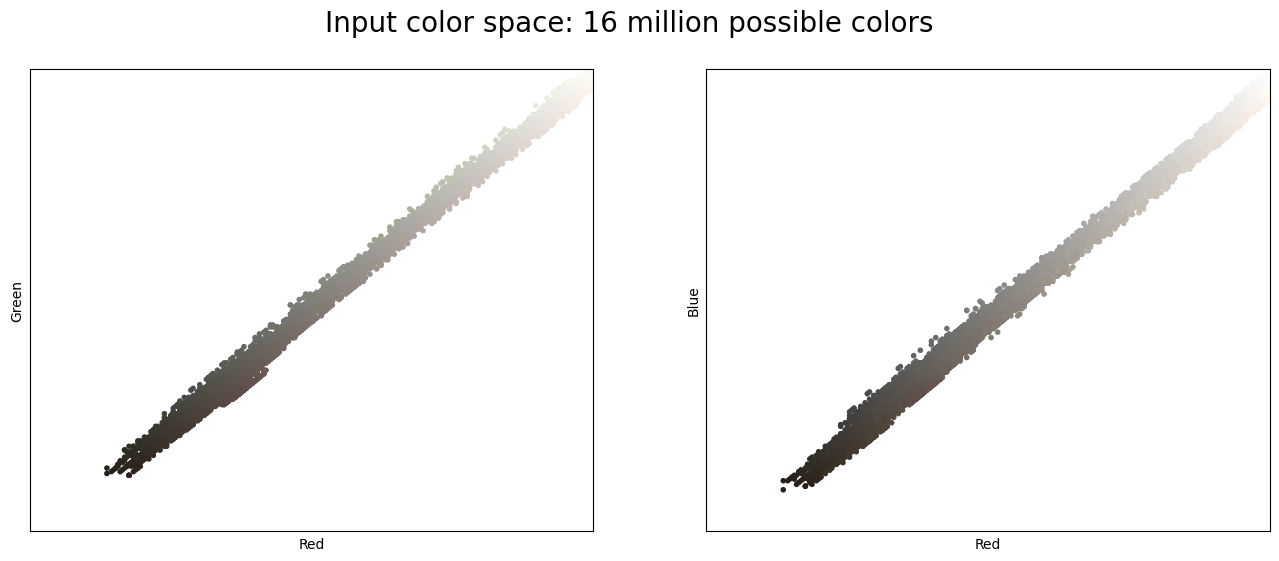

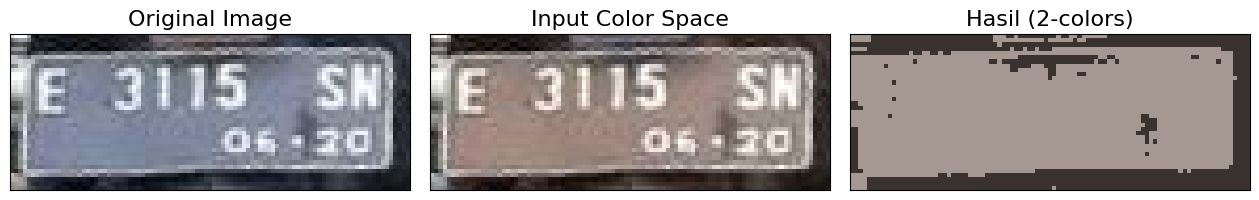

<Figure size 640x480 with 0 Axes>

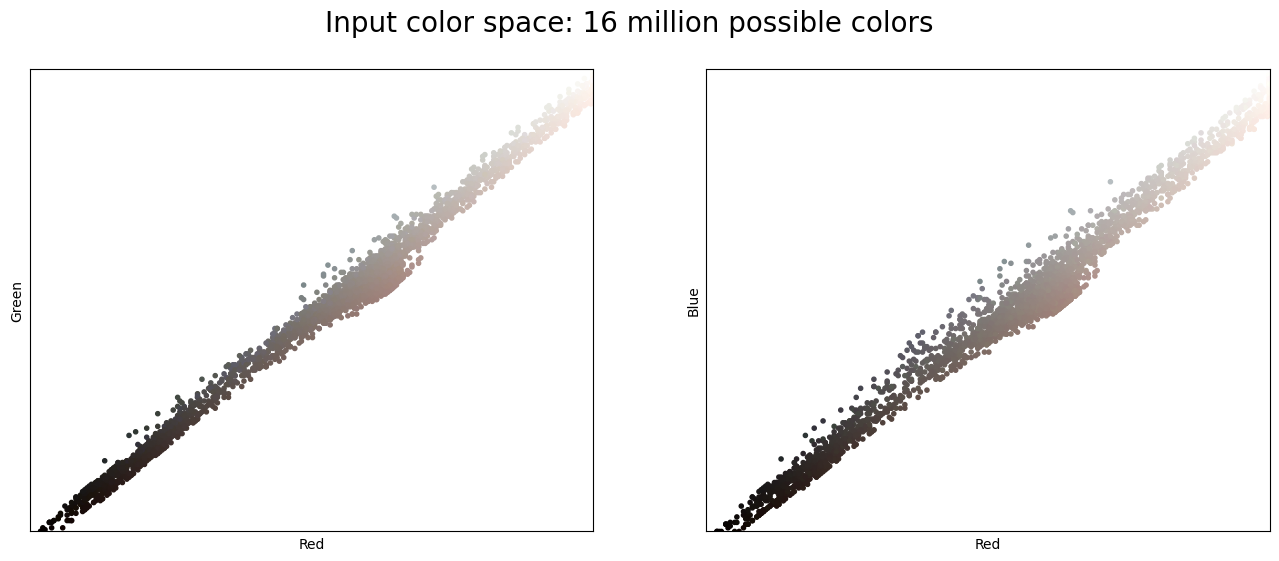

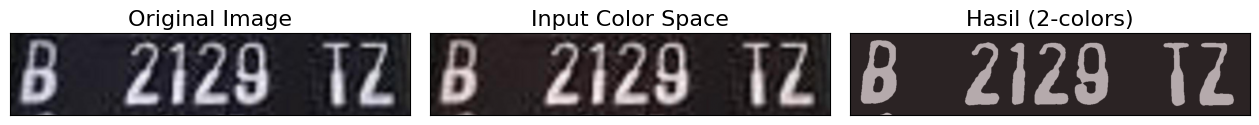

<Figure size 640x480 with 0 Axes>

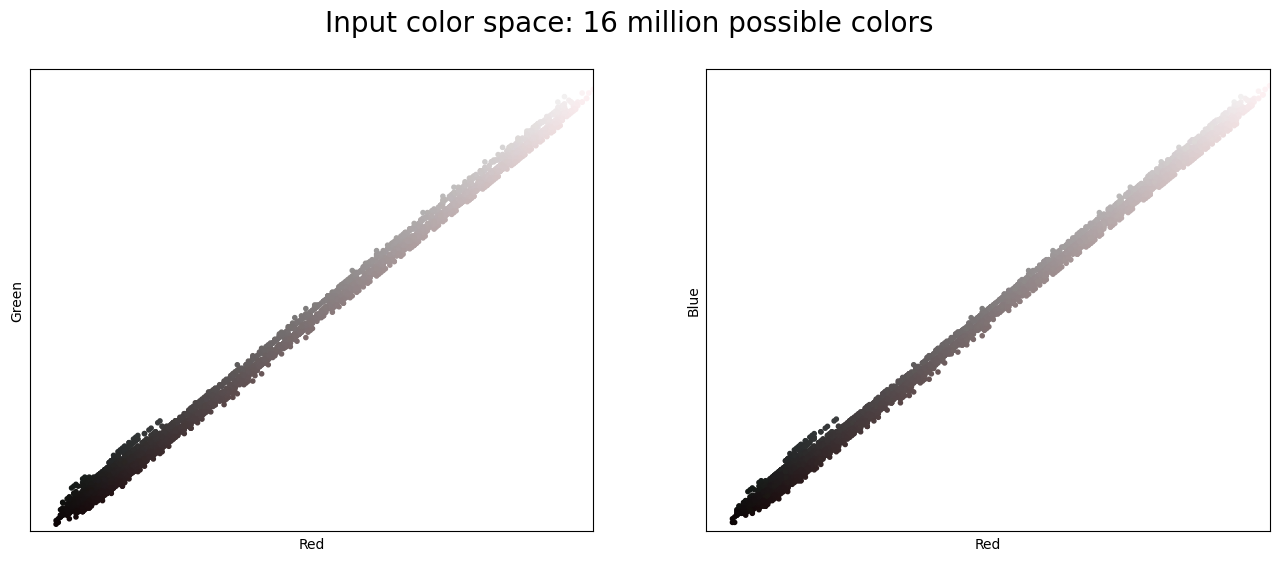

In [9]:
# Mengambil File dari variabel directory
# Fungsi os.listdir() digunakan untuk memuat daftar file dalam direktori, dan kemudian daftar tersebut difilter menggunakan fungsi endswith() untuk memilih hanya file yang berformat JPG, JPEG, atau PNG
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Ambil 5 indeks acak dari daftar gambar
random_indexes = random.sample(range(len(image_files)), 5)

# Loop melalui indeks gambar yang telah dipilih
for index in random_indexes:

    img_file = image_files[index]
    img_path = os.path.join(directory, img_file)
    img = cv2.imread(img_path)

    # PREPROCESSING
    h, w, ch = img.shape
    data = img / 255.0  # mengubah piksel menjadi rentang 0 hingga 1
    data = data.reshape(h * w, ch)  # mengubah bentuk citra menjadi array satu dimensi

    # Proses segmentasi dengan K-Means
    kmeans = KMeans(n_clusters=2, n_init=8) # jumlah klaster sebanyak 2 untuk menghasilkan gambar 2 warna (2-colors)
    kmeans.fit(data)  # melatih model
    predict = kmeans.predict(data)  # prediksi klaster
    cluster_centers = kmeans.cluster_centers_ # mendapatkan nilai titik tengah dari setiap cluster
    new_colors = cluster_centers[predict] # menentukan warna baru
    img_recolored = new_colors.reshape((h, w, ch))  # mengubah dimensi seperti gambar asli

    # Tampilkan citra asli, citra dalam color space, dan citra yang sudah di-segmentasi
    fig, ax = plt.subplots(1, 3, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(data.reshape((h, w, ch)))
    ax[1].set_title('Input Color Space', size=16)
    ax[2].imshow(img_recolored)
    ax[2].set_title('Hasil (2-colors)', size=16)

    # Tampilkan plot color space
    plt.figure()
    plot_pixels(data, title='Input color space: 16 million possible colors')

    plt.show('\n')


### **Citra 3** (Muhammad Akbar Nur Ihsan)

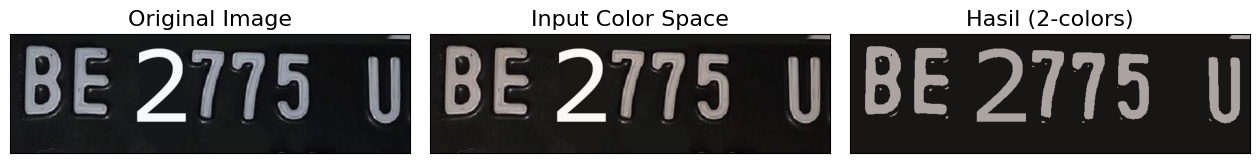

<Figure size 640x480 with 0 Axes>

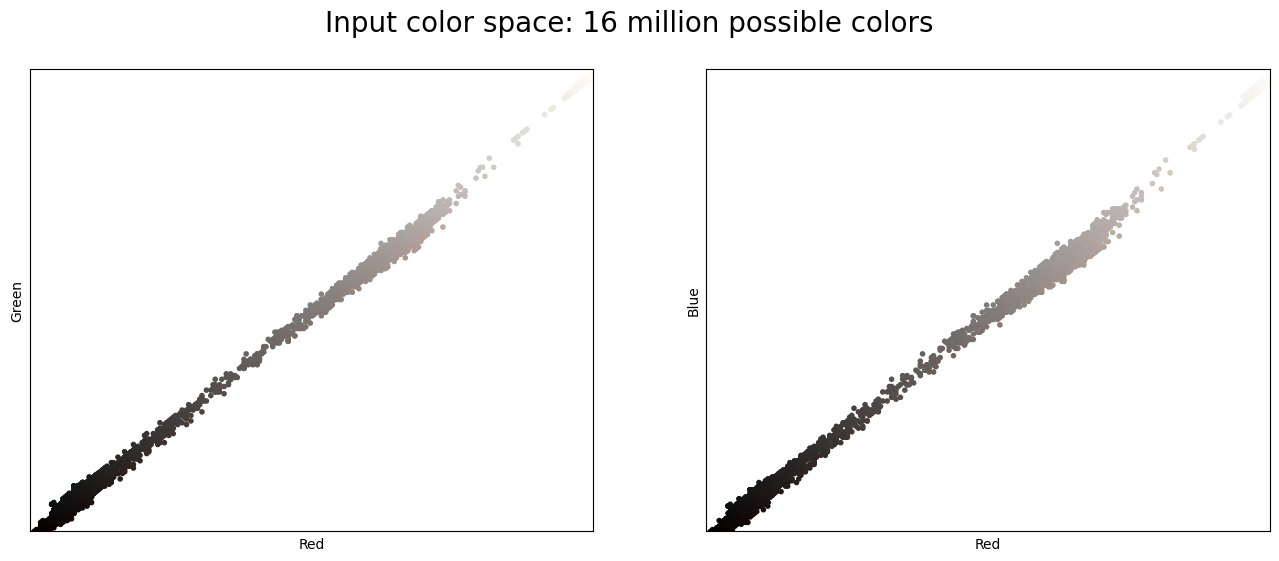

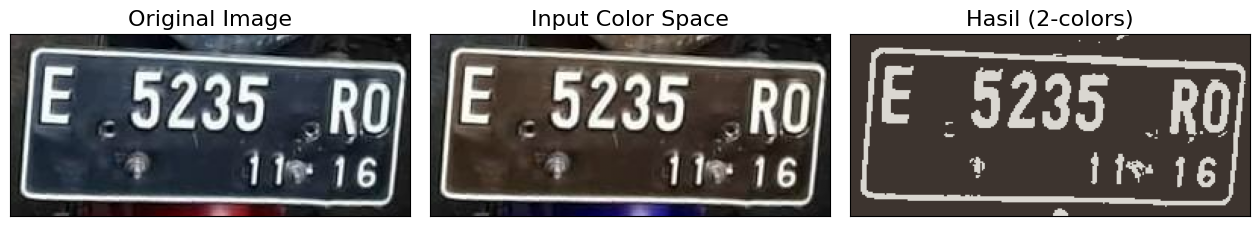

<Figure size 640x480 with 0 Axes>

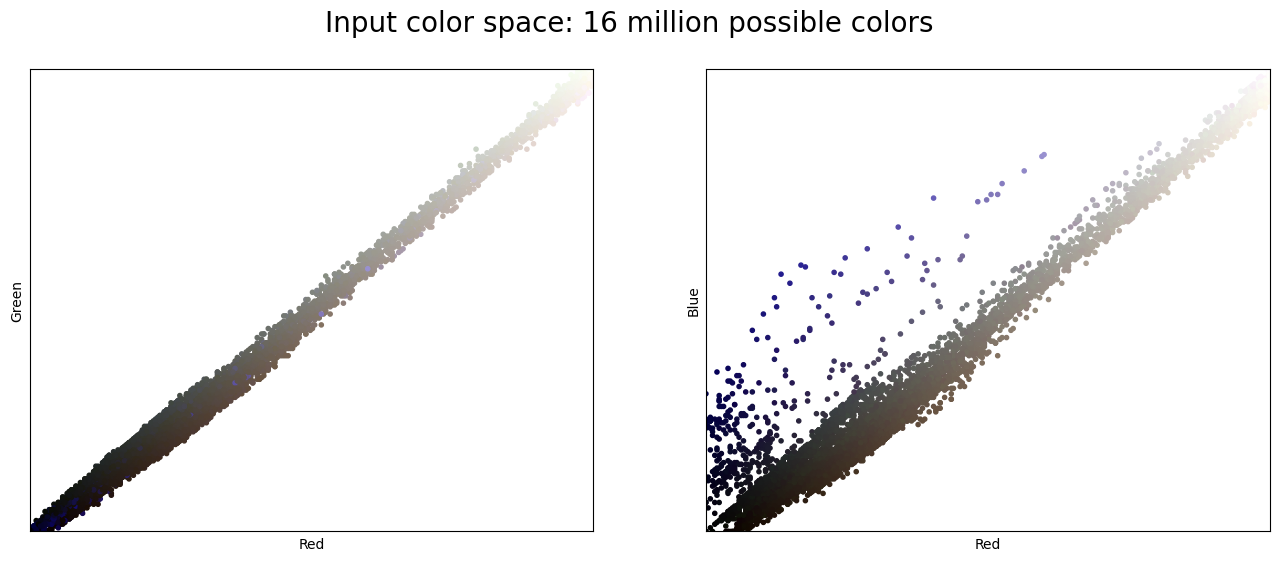

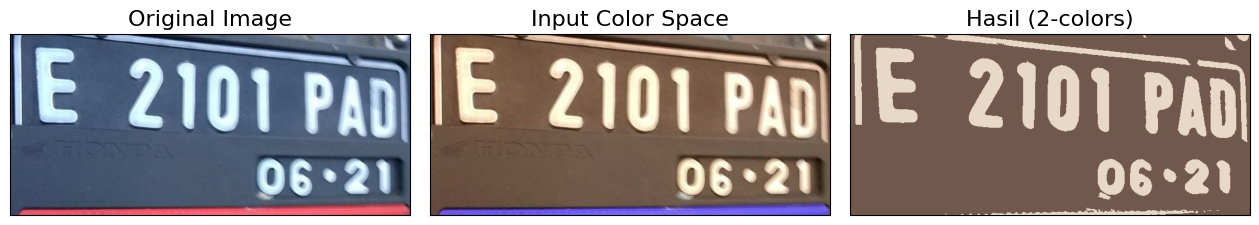

<Figure size 640x480 with 0 Axes>

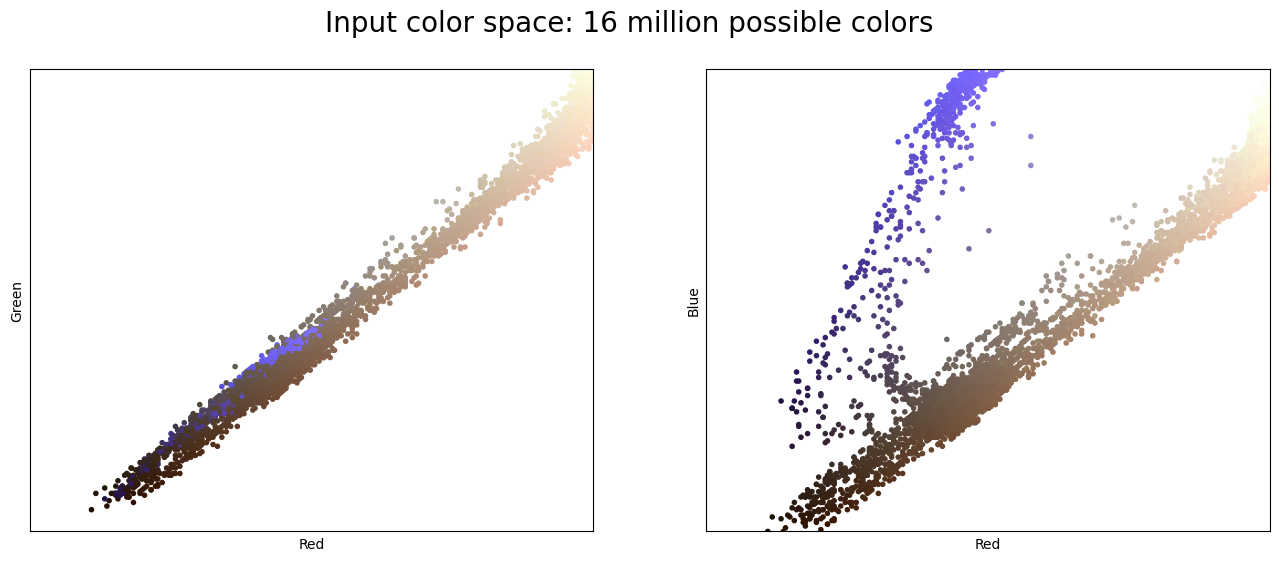

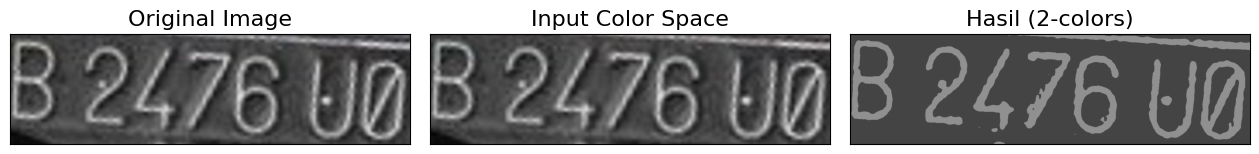

<Figure size 640x480 with 0 Axes>

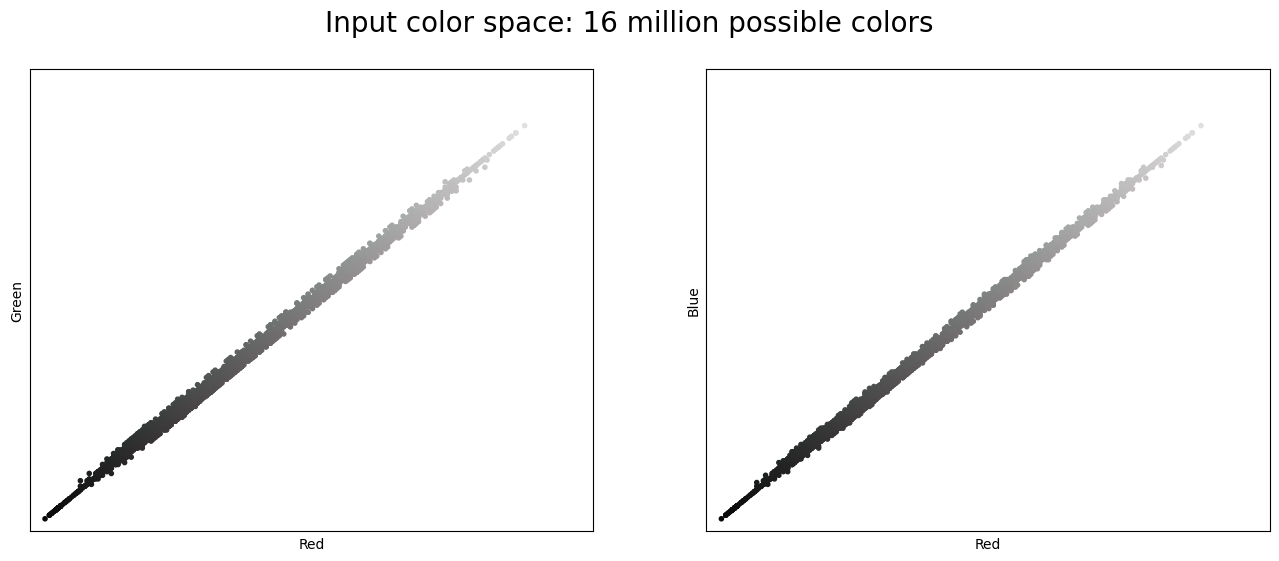

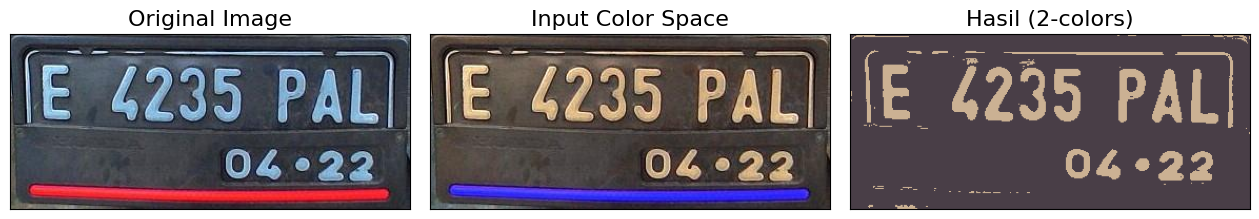

<Figure size 640x480 with 0 Axes>

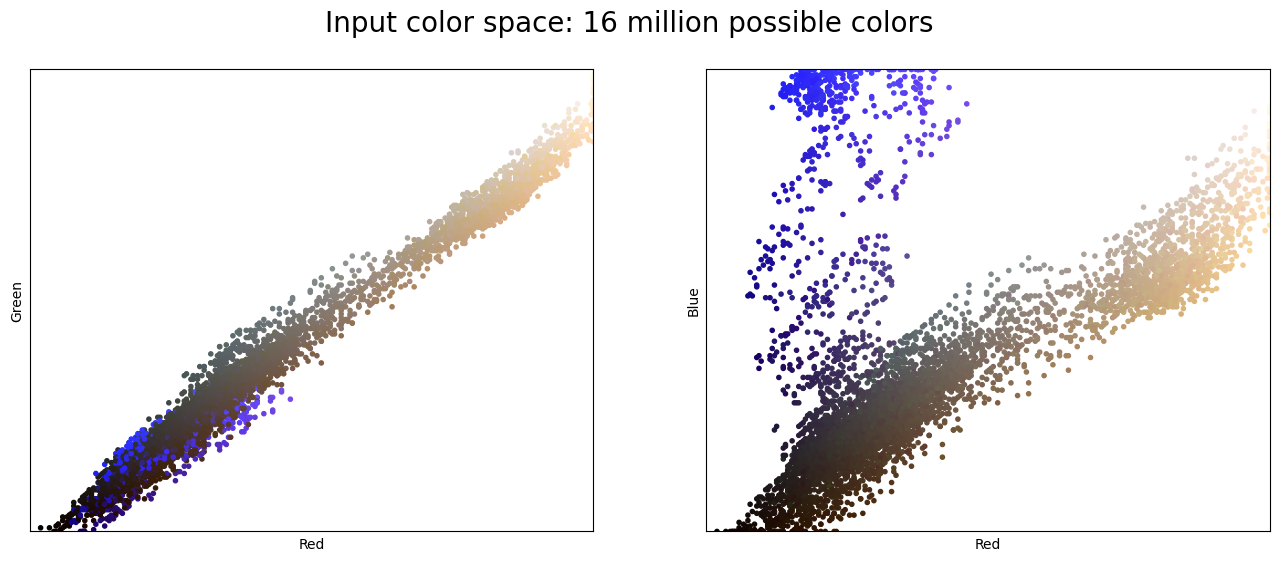

In [10]:
# Mengambil File dari variabel directory
# Fungsi os.listdir() digunakan untuk memuat daftar file dalam direktori, dan kemudian daftar tersebut difilter menggunakan fungsi endswith() untuk memilih hanya file yang berformat JPG, JPEG, atau PNG
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Ambil 5 indeks acak dari daftar gambar
random_indexes = random.sample(range(len(image_files)), 5)

# Loop melalui indeks gambar yang telah dipilih
for index in random_indexes:

    img_file = image_files[index]
    img_path = os.path.join(directory, img_file)
    img = cv2.imread(img_path)

    # PREPROCESSING
    h, w, ch = img.shape
    data = img / 255.0  # mengubah piksel menjadi rentang 0 hingga 1
    data = data.reshape(h * w, ch)  # mengubah bentuk citra menjadi array satu dimensi

    # Proses segmentasi dengan K-Means
    kmeans = KMeans(n_clusters=2, n_init=8) # jumlah klaster sebanyak 2 untuk menghasilkan gambar 2 warna (2-colors)
    kmeans.fit(data)  # melatih model
    predict = kmeans.predict(data)  # prediksi klaster
    cluster_centers = kmeans.cluster_centers_ # mendapatkan nilai titik tengah dari setiap cluster
    new_colors = cluster_centers[predict] # menentukan warna baru
    img_recolored = new_colors.reshape((h, w, ch))  # mengubah dimensi seperti gambar asli

    # Tampilkan citra asli, citra dalam color space, dan citra yang sudah di-segmentasi
    fig, ax = plt.subplots(1, 3, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(data.reshape((h, w, ch)))
    ax[1].set_title('Input Color Space', size=16)
    ax[2].imshow(img_recolored)
    ax[2].set_title('Hasil (2-colors)', size=16)

    # Tampilkan plot color space
    plt.figure()
    plot_pixels(data, title='Input color space: 16 million possible colors')

    plt.show('\n')
